# Compte Rendu °3 :TP3 Vecteurs aléatoire


# Importation des biblios 

In [13]:
import matplotlib.pyplot as plt
import numpy as np


#  Exercice 1

In [3]:

def simulate_distributions(n_simulations, seed=42):
    """
    Simule les distributions X1, X2, et X3.

    Parameters:
    n_simulations (int): Nombre de simulations à effectuer.
    seed (int): Graine pour le générateur de nombres aléatoires.

    Returns:
    np.ndarray: Matrice des simulations avec X1, X2, et X3.
    """
    np.random.seed(seed)

    X1 = np.random.exponential(scale=2, size=n_simulations)

    X2 = np.random.gamma(shape=3, scale=1, size=n_simulations)

    X3 = np.random.binomial(n=1, p=0.25, size=n_simulations)

    X = np.column_stack((X1, X2, X3))

    return X

def calculate_statistics(X):
    """
    Calcule l'espérance et la matrice de covariance des simulations.

    Parameters:
    X (np.ndarray): Matrice des simulations.

    Returns:
    tuple: Espérance et matrice de covariance des simulations.
    """
    mean_X = X.mean(axis=0)

    cov_matrix_X = np.cov(X, rowvar=False)

    return mean_X, cov_matrix_X

def main():
    n_simulations = 10000
    
    X = simulate_distributions(n_simulations)

    mean_X, cov_matrix_X = calculate_statistics(X)

    print("Espérance estimée de X :")
    print(mean_X)
    print("\nMatrice de covariance estimée de X :")
    print(cov_matrix_X)

if __name__ == "__main__":
    main()


Espérance estimée de X :
[1.95499791 3.01808701 0.2478    ]

Matrice de covariance estimée de X :
[[ 3.79785813e+00 -3.53644471e-03 -9.61993235e-04]
 [-3.53644471e-03  2.92798865e+00  5.46837444e-03]
 [-9.61993235e-04  5.46837444e-03  1.86413801e-01]]


# Exercice2

In [7]:
rho = 0.7
K = np.array([[1, rho], [rho, 1]])
A = np.linalg.cholesky(K)
print("Matrice A obtenue par décomposition de Cholesky est donnée par :\n", A)


Matrice A obtenue par décomposition de Cholesky est donnée par :
 [[1.         0.        ]
 [0.7        0.71414284]]


In [9]:
Z = np.random.randn(2)
print("Vecteur gaussien Z généré :\n", Z)


Vecteur gaussien Z généré :
 [ 0.34299511 -1.14109136]


In [10]:
X = np.dot(A, Z)
print("Vecteur X calculé :\n", X)


Vecteur X calculé :
 [ 0.34299511 -0.57480565]


In [11]:
num_simulations = 10000
X_samples = np.array([np.dot(A, np.random.randn(2)) for _ in range(num_simulations)])

mean_X = np.mean(X_samples, axis=0)
cov_X = np.cov(X_samples, rowvar=False)

print("Moyenne empirique de X (doit être proche de [0, 0]):\n", mean_X)
print("Matrice de covariance empirique de X (doit être proche de K):\n", cov_X)


Moyenne empirique de X (doit être proche de [0, 0]):
 [ 0.00032725 -0.00041794]
Matrice de covariance empirique de X (doit être proche de K):
 [[0.97138623 0.68850167]
 [0.68850167 1.00864319]]


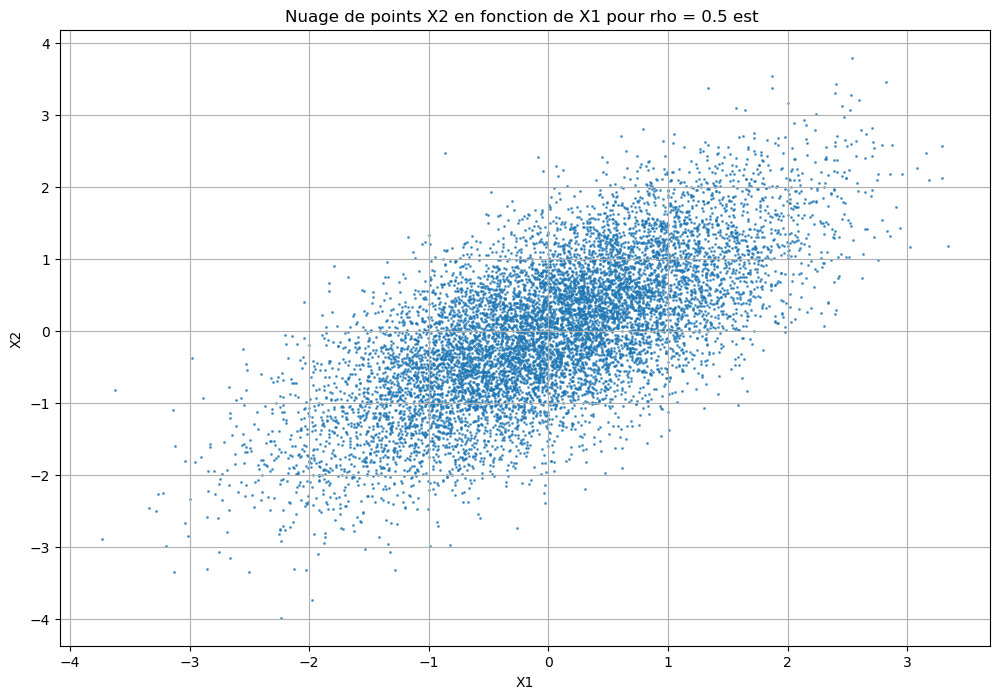

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_samples[:, 0], X_samples[:, 1], alpha=0.7, s=1)
plt.title(f"Nuage de points X2 en fonction de X1 pour rho = 0.5 est ")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

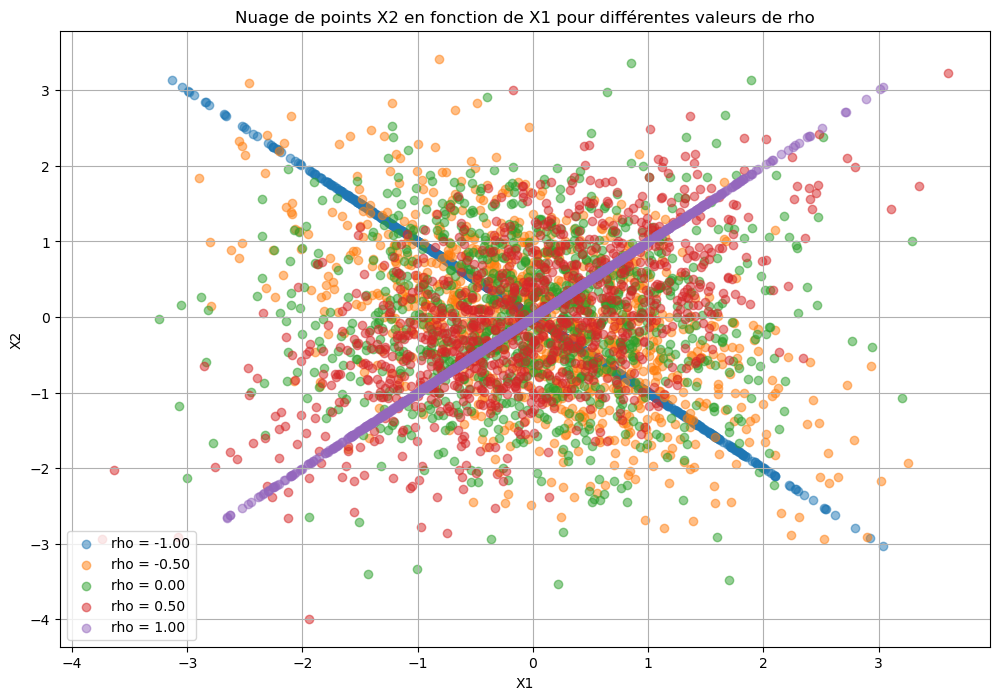

In [15]:
def generate_gaussian_2d(rho, n_samples=1000):
    """
    Génère des échantillons à partir d'une distribution normale bivariée.

    Parameters:
    rho (float): Coefficient de corrélation entre les deux variables.
    n_samples (int): Nombre d'échantillons à générer.

    Returns:
    np.ndarray: Matrice des échantillons générés.
    """
    K = np.array([[1, rho], [rho, 1]])
    X = np.random.multivariate_normal([0, 0], K, size=n_samples)
    return X

def plot_gaussian_samples(rho_values, n_samples=1000):
    """
    Trace les nuages de points pour différentes valeurs de rho.

    Parameters:
    rho_values (list or np.ndarray): Liste des valeurs de rho à tester.
    n_samples (int): Nombre d'échantillons à générer pour chaque valeur de rho.
    """
    plt.figure(figsize=(12, 8))

    for rho in rho_values:
        X = generate_gaussian_2d(rho, n_samples)  
        plt.scatter(X[:, 0], X[:, 1], label=f'rho = {rho:.2f}', alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Nuage de points X2 en fonction de X1 pour différentes valeurs de rho")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    rho_values = np.linspace(-1, 1, 5)
    plot_gaussian_samples(rho_values)

if __name__ == "__main__":
    main()


# Exercice 3

#### Question 1

**La moyenne et de la matrice de covariance**

In [16]:
m = np.array([-1, 0, 2])
K = np.array([[14, 8, 3], [8, 6, -3], [3, -3, 26]])


**Décomposition de Cholesky de la matrice de covariance**


In [17]:
A = np.linalg.cholesky(K)

print("Matrice A décomposition de Cholesky de K est :\n", A)


Matrice A décomposition de Cholesky de K est :
 [[ 3.74165739  0.          0.        ]
 [ 2.13808994  1.19522861  0.        ]
 [ 0.80178373 -3.94425441  3.13049517]]


#### Question 2

In [18]:
num_simulations = 10000
X_samples = np.array([m + np.dot(A, np.random.randn(3)) for _ in range(num_simulations)])
mean_X = np.mean(X_samples, axis=0)
print("Moyenne empirique de X (doit être proche de m = [-1, 0, 2]):\n", mean_X)

Moyenne empirique de X (doit être proche de m = [-1, 0, 2]):
 [-0.99295528  0.00339941  2.00401423]


In [19]:
cov_X = np.cov(X_samples, rowvar=False)
print("Matrice de covariance empirique de X  :\n", cov_X)

Matrice de covariance empirique de X  :
 [[14.17289098  8.11539234  2.84140984]
 [ 8.11539234  6.06787425 -3.09530415]
 [ 2.84140984 -3.09530415 26.17347095]]


#### Question 3:

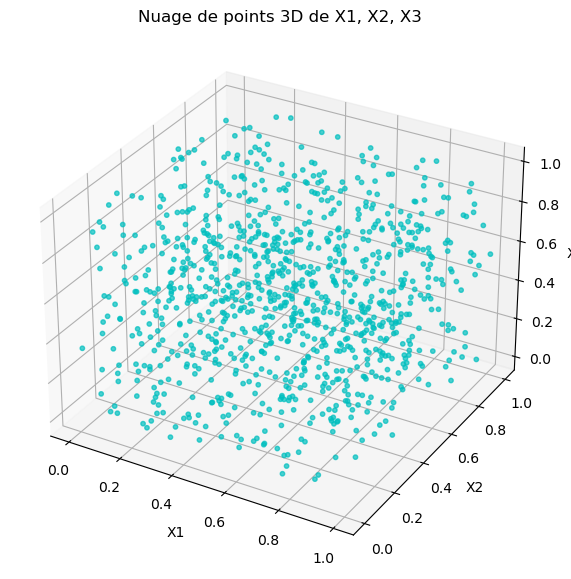

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(X_samples, alpha=0.5, s=1, color='b'):
    """
    Trace un nuage de points 3D avec les données fournies.

    Parameters:
    X_samples (np.ndarray): Matrice des échantillons à tracer.
    alpha (float): Transparence des points.
    s (int): Taille des points.
    color (str): Couleur des points.
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_samples[:, 0], X_samples[:, 1], X_samples[:, 2], alpha=alpha, s=s, c=color)
    ax.set_title("Nuage de points 3D de X1, X2, X3")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    plt.show()

def main():
    np.random.seed(42)
    X_samples = np.random.rand(1000, 3)  

    plot_3d_scatter(X_samples, alpha=0.7, s=10, color='c') 

if __name__ == "__main__":
    main()


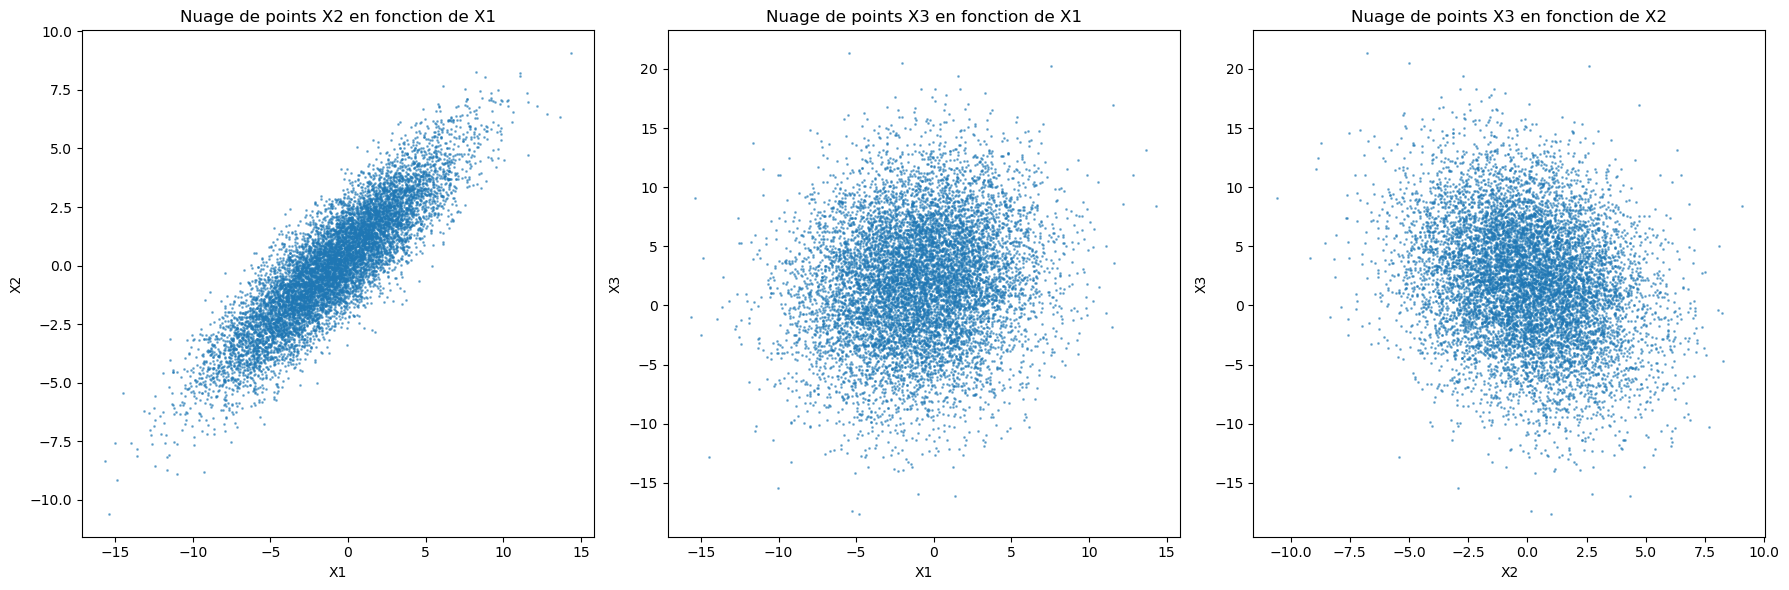

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].scatter(X_samples[:, 0], X_samples[:, 1], alpha=0.5, s=1)
axs[0].set_title("Nuage de points X2 en fonction de X1")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[1].scatter(X_samples[:, 0], X_samples[:, 2], alpha=0.5, s=1)
axs[1].set_title("Nuage de points X3 en fonction de X1")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X3")

axs[2].scatter(X_samples[:, 1], X_samples[:, 2], alpha=0.5, s=1)
axs[2].set_title("Nuage de points X3 en fonction de X2")
axs[2].set_xlabel("X2")
axs[2].set_ylabel("X3")

plt.tight_layout()
plt.show()
